In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.neighbors import NearestNeighbors
from random import randint
from sklearn.mixture import GaussianMixture

In [3]:
data = np.loadtxt('faithful.csv',delimiter = ",", skiprows = 1)

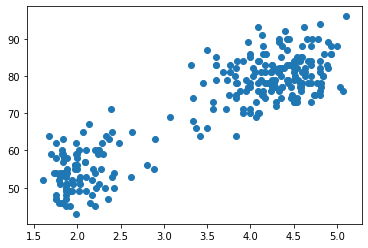

In [4]:
plt.scatter(data[:,0],data[:,1])

In [9]:
def plotCluster(data, kCluster):
    
    colors = []
    n = len(kCluster + 1)
    for i in range(n):
        colors.append('#%06X' % randint(0, 0xFFFFFF))

    for i in range(len(data[:,1])):
        colorScatter = colors[kCluster[i]]
        if kCluster[i] == -1:
            plt.scatter(data[i,0], data[i,1], color = colorScatter,marker = 'X', s = 100)
        else:
            plt.scatter(data[i,0], data[i,1], color = colorScatter)
    return plt.show()

# Part 1
# K-mean clustering
As a first step, use random initialization.

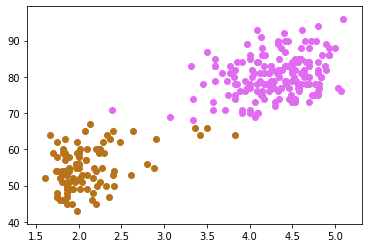

In [10]:
kmeans = KMeans(n_clusters=2, init = 'random').fit(data)
blackBoxLabels = kmeans.labels_
plotCluster(data,blackBoxLabels)

Now use k-means ++, see if it makes any difference.

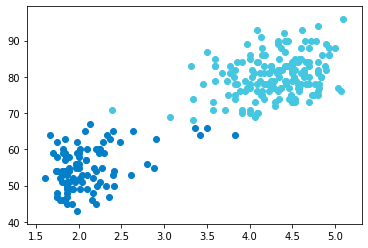

In [11]:
kmeans = KMeans(n_clusters=2).fit(data)
blackBoxLabels = kmeans.labels_
plotCluster(data,blackBoxLabels)

I can't see any difference between two methods.

# Part 2
# Density Based Clustering

In [12]:
nbrs = NearestNeighbors(n_neighbors=20).fit(data)
distances, indices = nbrs.kneighbors(data)
distanceToPlot = np.sort(distances[:,19])

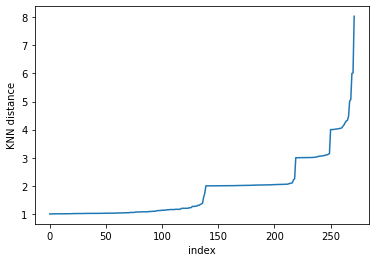

In [13]:
index = np.arange(len(distanceToPlot))
plt.plot(index,distanceToPlot)
plt.ylabel('KNN distance')
plt.xlabel('index')
plt.savefig('KNNPlot.png')

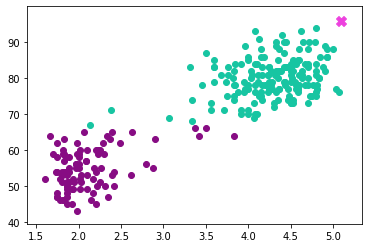

In [14]:
clustering = DBSCAN(eps = 3.5, min_samples=20).fit(data)
clusteringLabels = clustering.labels_
plotCluster(data, clusteringLabels)

DBSCAN seems to doing a good job distinguishing the clusters. Note that the cross marker show the ignored data point. However, this method is highly sensitive to input parameters. One can try to use OPTICS which addresses the shortcomings of DBSCAN.

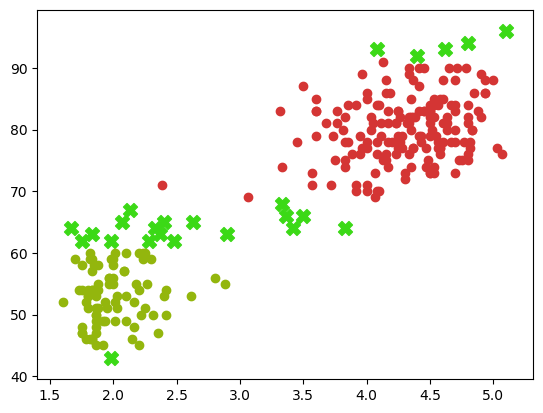

In [52]:
clustering = OPTICS(min_samples = 10, xi=0.1, min_cluster_size=.1).fit(data)
clusteringLabels = clustering.labels_
# plt.figure(figsize=(10,10))
plt.style.use('default')
# print(plt.style.available)
# plt.style.use('seaborn-pastel')
plotCluster(data, clusteringLabels)

OPTICS tend to label more points as noise.

# Part 3

# This seems to be working fine. Now lets see what GMM predicts.

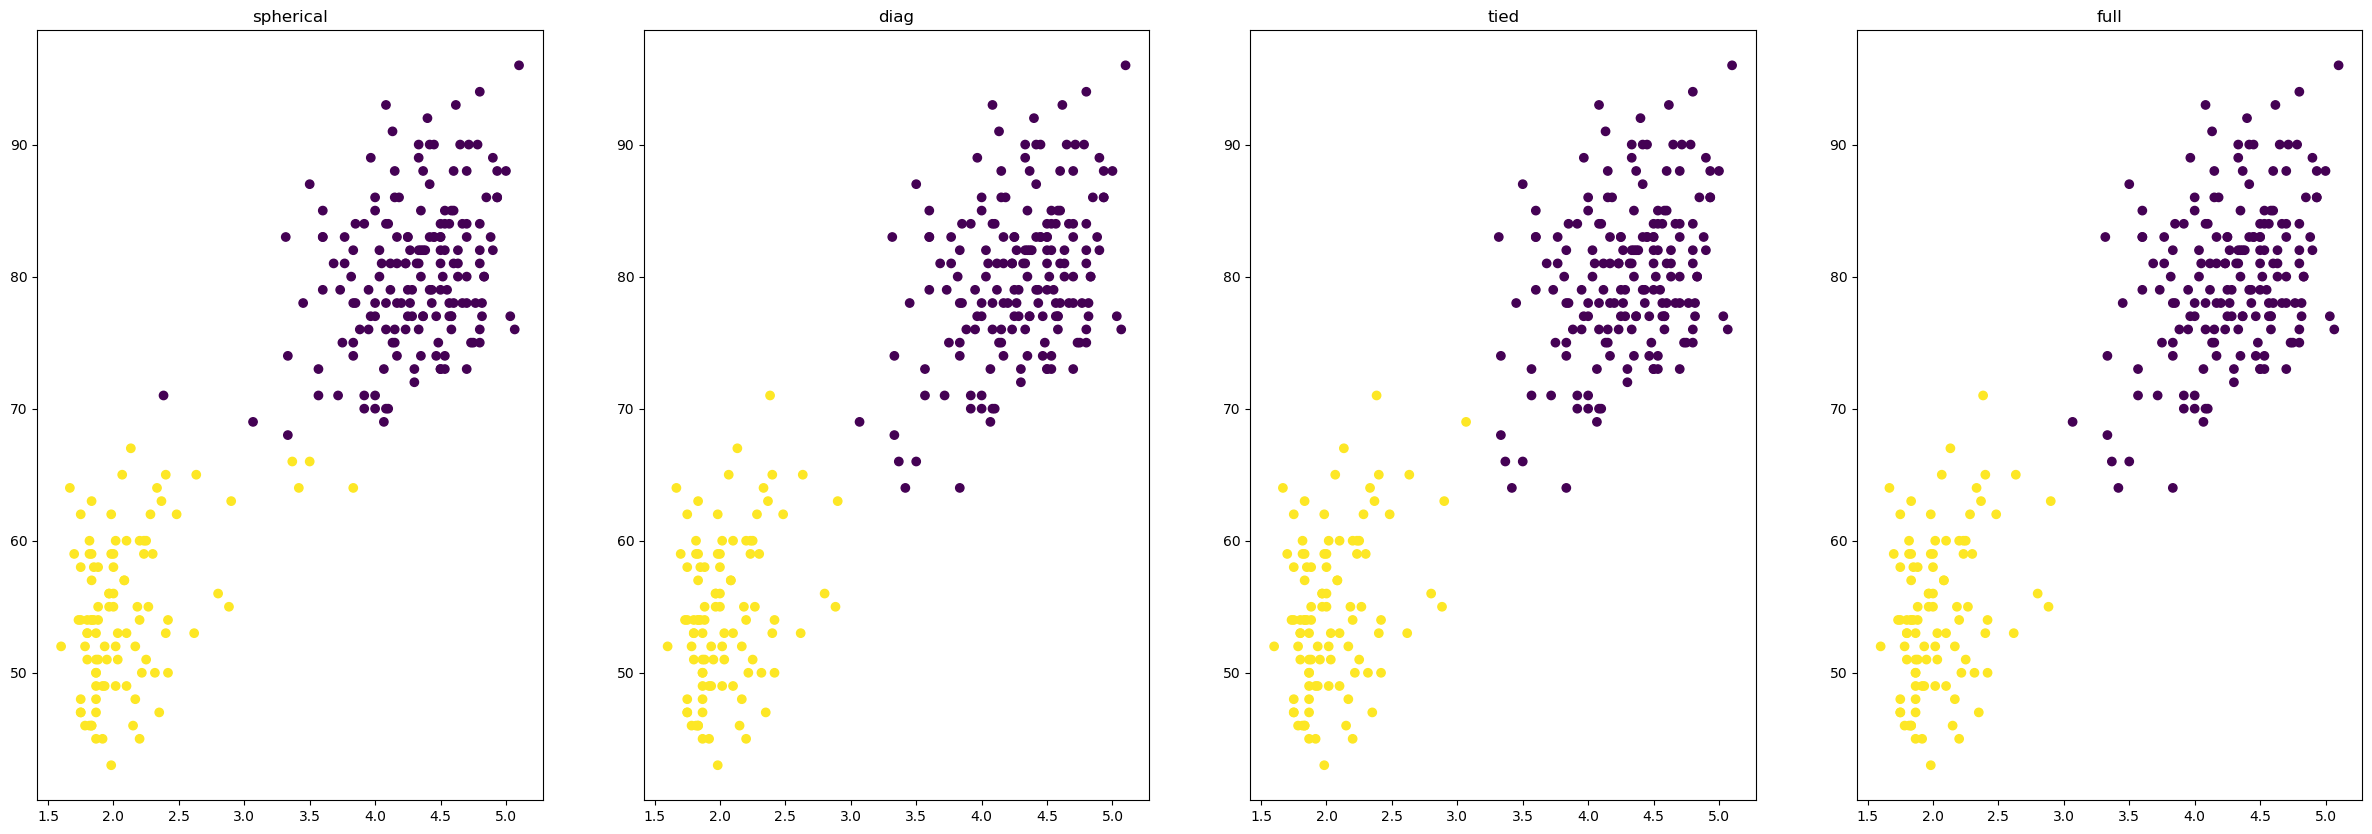

In [56]:
plt.figure(figsize=(30,10))

covarianceTypes = ['spherical', 'diag', 'tied', 'full']


for count, covariance in enumerate(covarianceTypes):


    plt.subplot(1, len(covarianceTypes), count + 1)
    gmm = GaussianMixture(n_components = 2, covariance_type= covariance, random_state = 10)
    gmm.fit(data)
    labels = gmm.predict(data)
    plt.scatter(data[:,0],data[:,1], c = labels)
    plt.title(covariance)

Using different covariance types resulted with different labeling for noisy data points. Overall, they give similar results.